In [1]:
# Load data from file imdb_master.csv
import pandas as pd

lines = pd.read_csv('imdb_master.csv', encoding='ISO-8859-1')
# Remove the rows with missing values
data = lines.dropna()
# Ignore the values in the label column with the value 'unsup'
data = data[data.label != 'unsup']
# Remove files column and index column from the csv.
data = data.iloc[0:, 1:-1]
# Turn the data into dataframe.
df=pd.DataFrame(data, columns=['type', 'review', 'label'])
df.head()

,type,review,label
0,test,Once again Mr. Costner has dragged out a movie...,neg
1,test,This is an example of why the majority of acti...,neg
2,test,"First of all I hate those moronic rappers, who...",neg
3,test,Not even the Beatles could write songs everyon...,neg
4,test,Brass pictures (movies is not a fitting word f...,neg


In [2]:
# Text preprocessing: Lowering Case
df.review = df.review.apply(lambda x: x.lower())
df.head()

,type,review,label
0,test,once again mr. costner has dragged out a movie...,neg
1,test,this is an example of why the majority of acti...,neg
2,test,"first of all i hate those moronic rappers, who...",neg
3,test,not even the beatles could write songs everyon...,neg
4,test,brass pictures (movies is not a fitting word f...,neg


In [3]:
# Text preprocessing: Contractions
import contractions, re
import pprint

df.review = df.review.apply(lambda x: contractions.fix(x))
df.review = df.review.apply(lambda x: re.sub(r"\'nt", " not", x))
df.head()

,type,review,label
0,test,once again mr. costner has dragged out a movie...,neg
1,test,this is an example of why the majority of acti...,neg
2,test,"first of all i hate those moronic rappers, who...",neg
3,test,not even the beatles could write songs everyon...,neg
4,test,brass pictures (movies is not a fitting word f...,neg


In [4]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
sw_nltk.remove('not')
print(sw_nltk)
print(len(sw_nltk))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [5]:
# count words in df
all_words = []
# get unique words from all reviews
for i in range(0, len(df)):
    all_words.append(df.review[i].split())
all_words = [item for sublist in all_words for item in sublist]
all_words = list((all_words))

print({
    'all_words': len(all_words)
})


{'all_words': 11719329}


In [6]:
# Text preprocessing: Stopword removal & Tokenization 
import nltk 
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
word_tokens = []
for i in range(0, len(df)):
    word_tokens.append(nltk.wordpunct_tokenize(df.review[i]))
word_tokens = [[word for word in words if word not in stop_words] for words in word_tokens] 
word_tokens = [' '.join(words) for words in word_tokens]
df.review = word_tokens

In [7]:
# count words in df
stop_w = []
# get unique words from all reviews
for i in range(0, len(df)):
    stop_w.append(df.review[i].split())
stop_w = [item for sublist in stop_w for item in sublist]
stop_w = list((stop_w))

print({ 'all_words_after_stop_words': len(stop_w)})

{'all_words_after_stop_words': 8108563}


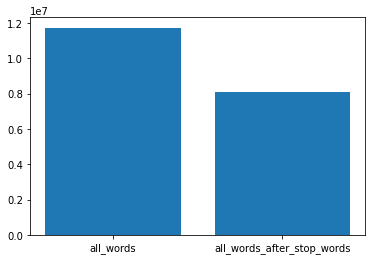

In [8]:
# plot graph between all_words and all_words_after_stop_words
import matplotlib.pyplot as plt
# plot bar graph between all_words and all_words_after_stop_words
plt.bar(['all_words', 'all_words_after_stop_words'], [len(all_words), len(stop_w)])
# show the plot
plt.show()





In [9]:
# remove punctuation & html tags
import string
df.review = df.review.apply(lambda x: re.sub(r'<.*?>', '', x))
df.review = df.review.apply(lambda x: re.sub(r'\s+', ' ', x))
df.review = df.review.apply(lambda x: re.sub(r'\d+', ' ', x))
df.review = df.review.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df.review = df.review.apply(lambda x: re.sub(r'https?://\S+|www\.\S+', '', x)) # remove links
df.head()

,type,review,label
0,test,mr costner dragged movie far longer necessary...,neg
1,test,example majority action films generic boring ...,neg
2,test,first hate moronic rappers could act gun pres...,neg
3,test,even beatles could write songs everyone liked ...,neg
4,test,brass pictures movies fitting word really so...,neg


In [10]:
# Text preprocessing: Stemming
from nltk.stem import SnowballStemmer, PorterStemmer
stemmer = SnowballStemmer("english")
pstemmer = PorterStemmer()
for word in df.review[500].split(): 
    print('W:', word, 'SS:', stemmer.stem(word), 'PS:', pstemmer.stem(word))


W: really SS: realli PS: realli
W: sure SS: sure PS: sure
W: begin SS: begin PS: begin
W: start SS: start PS: start
W: finish SS: finish PS: finish
W: bad SS: bad PS: bad
W: stinky SS: stinki PS: stinki
W: bad SS: bad PS: bad
W: like SS: like PS: like
W: stepping SS: step PS: step
W: port SS: port PS: port
W: john SS: john PS: john
W: degree SS: degre PS: degre
W: day SS: day PS: day
W: force SS: forc PS: forc
W: watch SS: watch PS: watch
W: keep SS: keep PS: keep
W: vicodin SS: vicodin PS: vicodin
W: handy SS: handi PS: handi
W: pain SS: pain PS: pain
W: never SS: never PS: never
W: understand SS: understand PS: understand
W: flicks SS: flick PS: flick
W: bad SS: bad PS: bad
W: make SS: make PS: make
W: past SS: past PS: past
W: cutting SS: cut PS: cut
W: room SS: room PS: room
W: without SS: without PS: without
W: entire SS: entir PS: entir
W: reel SS: reel PS: reel
W: ending SS: end PS: end
W: floor SS: floor PS: floor
W: movie SS: movi PS: movi
W: cross SS: cross PS: cross
W: gumby

# Text Processing: Lemmatization 

In this notebook, we will not use Lemmatization. `Assign.py` will have a config value for lemmatization.

```python
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df.review = df.review.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head()
```

In [11]:
df_train = df[df.type == 'train']
df_test = df[df.type == 'test']

# reset index 
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.head()


,type,review,label
0,train,story man unnatural feelings pig starts openi...,neg
1,train,airport starts brand new luxury plane loa...,neg
2,train,film lacked something could put finger first ...,neg
3,train,sorry everyone know supposed art film wow ...,neg
4,train,little parents took along theater see interior...,neg


In [12]:
from pprint import pprint
neg_words = df_train[df_train.label == 'neg'].review.apply(lambda x: x.split()).sum()
pos_words = df_train[df_train.label == 'pos'].review.apply(lambda x: x.split()).sum()
pprint({
    'neg_words': len(neg_words),
    'pos_words': len(pos_words)
})

{'neg_words': 1471125, 'pos_words': 1532171}


In [13]:
all_words = []
# get unique words from all reviews
for i in range(0, len(df)):
    all_words.append(df.review[i].split())
all_words = [item for sublist in all_words for item in sublist]
all_words = list((all_words))
unique_words = list(set(all_words))

pprint({
    'unique_words': len(unique_words),
    'all_words': len(all_words)
})

{'all_words': 5936529, 'unique_words': 100947}


In [14]:
# get top 10 frequent words in dataset
from collections import Counter
c = Counter(all_words)
u = Counter(unique_words)
pprint({
    'top_10_frequent_words': c.most_common(10),
    'top_10_unique_words': u.most_common(10)
})


{'top_10_frequent_words': [('movie', 87956),
                           ('film', 79685),
                           ('one', 53593),
                           ('like', 40170),
                           ('would', 31279),
                           ('good', 29752),
                           ('time', 25098),
                           ('even', 24872),
                           ('story', 23114),
                           ('really', 23093)],
 'top_10_unique_words': [('approximated', 1),
                         ('chiz', 1),
                         ('ureen', 1),
                         ('twentyish', 1),
                         ('chupacabre', 1),
                         ('kaurismã', 1),
                         ('massages', 1),
                         ('noâ', 1),
                         ('reimburse', 1),
                         ('glancingly', 1)]}


In [15]:
all_pos_words = []
all_neg_words = []
for i in range(len(df)):
    if df.label[i] == 'pos':
        all_pos_words.append(df.review[i].split())
    if df.label[i] == 'neg':
        all_neg_words.append(df.review[i].split())
all_pos_words = [item for sublist in all_pos_words for item in sublist]
all_neg_words = [item for sublist in all_neg_words for item in sublist]
all_pos_words = list((all_pos_words))
all_neg_words = list((all_neg_words))
count_pos = Counter(all_pos_words)
count_neg = Counter(all_neg_words)
pprint({
    'all_pos_words': len(all_pos_words),
    'all_neg_words': len(all_neg_words),
    'count_pos': count_pos.most_common(10),
    'count_neg': count_neg.most_common(10)
})


{'all_neg_words': 2925215,
 'all_pos_words': 3011314,
 'count_neg': [('movie', 50108),
               ('film', 37585),
               ('one', 26273),
               ('like', 22457),
               ('would', 18021),
               ('even', 15254),
               ('good', 14727),
               ('bad', 14724),
               ('really', 12354),
               ('time', 12348)],
 'count_pos': [('film', 42100),
               ('movie', 37848),
               ('one', 27320),
               ('like', 17713),
               ('good', 15025),
               ('would', 13258),
               ('great', 12964),
               ('story', 12930),
               ('time', 12750),
               ('well', 12722)]}


In [16]:
unique_pos_words = []
unique_neg_words = []
for i in range(0, len(df_train)):
    if df_train.label[i] == 'neg':
        unique_neg_words.append(df_train.review[i].split())
    else:
        unique_pos_words.append(df_train.review[i].split())
unique_pos_words = [item for sublist in unique_pos_words for item in sublist]
unique_pos_words = list(set(unique_pos_words))
unique_neg_words = [item for sublist in unique_neg_words for item in sublist]
unique_neg_words = list(set(unique_neg_words))
pprint({ 
    'unique_pos_words': len(unique_pos_words),
    'unique_neg_words': len(unique_neg_words)
})

{'unique_neg_words': 53509, 'unique_pos_words': 55216}


In [17]:
import re

def tokenize(text):
    return re.split("\W+", text)
 
def get_word_counts(words):
    count_word = {}
    for word in words:
        count_word[word] = count_word.get(word, 0.0) 
    return count_word

In [29]:
from collections import defaultdict
from nltk.tokenize import word_tokenize
import math
class NaiveBayes:
    def __init__(self):
        self.nc = {}
        self.logprior = {}
        self.word_counts = {}
        self.vocabulary = set()
        self.loglikelihood = defaultdict(defaultdict)

    def get_word_counts(self, words):
        count_word = {}
        for word in words:
            count_word[word] = count_word.get(word, 0.0) + 1.0
        return count_word
        
    
    def get_bigram_counts(self, words):
        count_bigram = {}
        for i in range(len(words)-1):
            bigram = words[i] + ' ' + words[i+1]
            count_bigram[bigram] = count_bigram.get(bigram, 0.0) + 1.0
        return count_bigram

    def train(self, data, labels):
        # Number of docs
        Ndoc = len(labels)
        # Classes in the data
        C = set(labels)

        # For each class c belongs to C
        for class_ in C:
            # Number of docs in class c
            self.nc['pos' if class_ == 1 else 'neg'] = labels.count(class_)
            # logprior = log(nc/Ndoc)
            self.logprior['pos' if class_ == 1 else 'neg'] = math.log(
                self.nc['pos' if class_ == 1 else 'neg'] / Ndoc)
            self.word_counts['pos' if class_ == 1 else 'neg'] = {}

        # bigDoc
        for x, y in zip(data, labels):
            c = 'pos' if y == 1 else 'neg'
            counts = self.get_word_counts(word_tokenize(x))
            bigram_counts = self.get_bigram_counts(word_tokenize(x))
            for word, count in bigram_counts.items():
                if word not in self.vocabulary:
                    self.vocabulary.add(word)
                if word not in self.word_counts[c]:
                    self.word_counts[c][word] = 0.0

                self.word_counts[c][word] += count
            for word, count in counts.items():
                if word not in self.vocabulary:
                    self.vocabulary.add(word)
                if word not in self.word_counts[c]:
                    self.word_counts[c][word] = 0.0

                self.word_counts[c][word] += count

        for class_ in C:
            total_count = 0
            # occurrences of w in bigdoc
            for word in self.vocabulary:
                total_count += self.word_counts['pos' if class_ ==
                                                1 else 'neg'].get(word, 0.0)

            # loglikelihood[w,c]
            for word in self.vocabulary:
                count = self.word_counts['pos' if class_ == 1 else 'neg'].get(
                    word, 0.0)
                self.loglikelihood[class_][word] = (
                    (count + 1) / (total_count + 1 * len(self.vocabulary)))

    def classify(self, data):
        result = []
        for x in data:
            counts = self.get_word_counts(word_tokenize(x))
            bigram_counts = self.get_bigram_counts(word_tokenize(x))
            pos_score = 0
            neg_score = 0
            # sum logprior to score
            pos_score += self.logprior['pos']
            neg_score += self.logprior['neg']
            for word, _ in bigram_counts.items():
                try:
                    if word in self.vocabulary:
                        pos_score += self.loglikelihood['pos'][word]
                        neg_score += self.loglikelihood['neg'][word]
                except KeyError: 
                    netural_score = 0
                    pos_score += netural_score
                    neg_score += netural_score
            for word, _ in counts.items():
                if word in self.vocabulary:
                    pos_score += self.loglikelihood[1][word]
                    neg_score += self.loglikelihood[0][word]
            # instead of return argmax(sum[c]), we return append the result.
            if pos_score > neg_score:
                result.append(1)
            else:
                result.append(0)
        return result


nb = NaiveBayes()
train_review = df_train.review.tolist()
train_label = df_train.label.tolist()
train_label = [1 if x == 'pos' else 0 for x in train_label]
test_review = df_test.review.tolist()
test_label = df_test.label.tolist()
test_label = [1 if x == 'pos' else 0 for x in test_label]
nb.train(train_review, train_label)
prediction = nb.classify(df_test.review.tolist())


In [19]:
# train the model
nb = NaiveBayes()
train_review = df_train.review.tolist()
train_label = df_train.label.tolist()
train_label = [1 if x == 'pos' else 0 for x in train_label]
test_review = df_test.review.tolist()
test_label = df_test.label.tolist()
test_label = [1 if x == 'pos' else 0 for x in test_label]
nb.train(train_review, train_label)


In [20]:
prediction = nb.classify(df_test.review.tolist())

In [21]:
tpos = 0
fpos = 0
tneg = 0
fneg = 0
for i in range(len(prediction)):
    if prediction[i] == 1 and test_label[i] == 1:
        tpos += 1
    elif prediction[i] == 1 and test_label[i] == 0:
        tneg += 1
    elif prediction[i] == 0 and test_label[i] == 1:
        fpos += 1
    elif prediction[i] == 0 and test_label[i] == 0:
        fneg += 1

In [22]:
def confusion_matrix(tpos, fpos, tneg, fneg):
    print('True Positive:', tpos)
    print('False Positive:', fpos)
    print('True Negative:', tneg)
    print('False Negative:', fneg)
    return {
        'TP': tpos,
        'FP': fpos,
        'TN': tneg,
        'FN': fneg
    }

confusion_matrix(tpos, fpos, tneg, fneg)

""" 
unigram
True Positive: 9682
False Positive: 2818
True Negative: 1379
False Negative: 11121
bigram
True Positive: 10437
False Positive: 2063
True Negative: 1916
False Negative: 10584
"""


True Positive: 10099
False Positive: 2401
True Negative: 1656
False Negative: 10844


' \nunigram\nTrue Positive: 9682\nFalse Positive: 2818\nTrue Negative: 1379\nFalse Negative: 11121\nbigram\nTrue Positive: 10437\nFalse Positive: 2063\nTrue Negative: 1916\nFalse Negative: 10584\n'

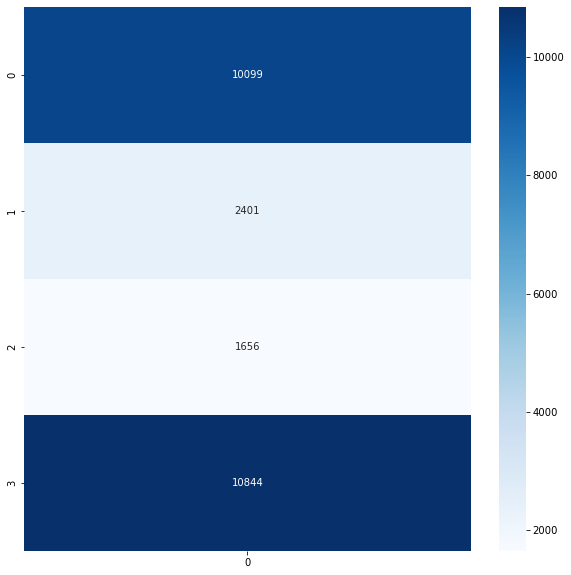

In [23]:
# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap([[tpos], [fpos], [tneg], [fneg]], annot=True, fmt='d', cmap='Blues')
plt.show()

In [24]:
precision = tpos / (tpos + fpos)
recall = tpos / (tpos + fpos)
f1 = 2 * (precision * recall) / (precision + recall)
pprint({
    'precision': precision,
    'recall': recall,
    'f1': f1
})


{'f1': 0.80792, 'precision': 0.80792, 'recall': 0.80792}


In [54]:
f1_scores = [0.814551679863043,
0.8126635493972804,
0.8025771625092508,
 0.8023002526792715,
 0.8069569720771654,
 0.8157692635890436,
 0.8091104426299958 ,
 0.8081382818224924 ,
 0.8343136442713941 ,
 0.8330850711684873 ,
 0.8233050847457628 ,
 0.8220267298257486 ,
 0.8370572658060246 ,
 0.83602561454245 ,
 0.8263432424409483 ,
 0.8225122902186811,
 0.8277606779946873,
 0.8267349594861245,
0.8087337746067222,
0.7968811255826109,
0.7974512285602059,
0.8015068849051701,
0.8014202823244132,
0.8013855812946525 ,
0.8011400440471563,
0.8222631711198591,
0.8271992077900644,
0.8153755074424898 ,
0.8157794596422985,
0.8290129816608284  ,
0.8290894107952205 ,
0.8180316061517604,
0.818228019651025]

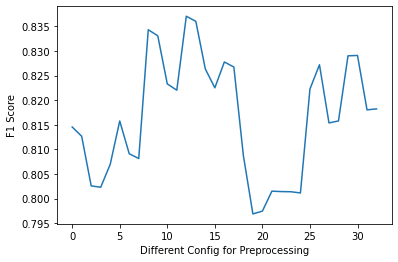

In [55]:
# plot f1 score in a graph
plt.plot(f1_scores)
plt.xlabel('Different Config for Preprocessing')
plt.ylabel('F1 Score')
plt.show()


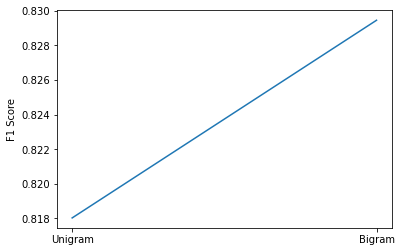

In [50]:
f1_score_list = [ 0.8180316061517604, 0.8294503691550452]
unigram_values = [9654, 2846, 1449, 11051]
bigram_values = [10111, 2389, 1769, 10731]


# plot f1 score in a graph
plt.plot(f1_score_list)
# display config value in the graph 
plt.xticks(range(len(f1_score_list)), ['Unigram', 'Bigram'])
plt.ylabel('F1 Score')
plt.show()
# plt.savefig('uvsb.png')


In [51]:
configs = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                configs.append({
                    "stemming": i,
                    "stop_words_removal": j,
                    "contractions": k,
                    "punctuation_removal": l,
                    "lemmatization": 0
                })
print(len(configs))


16
